# 0. Useful links and material

*   Google or-tools installation:  https://developers.google.com/optimization/introduction/installing
*   Quick startt with or-tools:
https://developers.google.com/optimization/introduction/get_started
*   Complete documentation:
https://developers.google.com/optimization/
*   Learn from examples:
https://github.com/google/or-tools/tree/stable/examples/python

The following part of the notebook introduces to the 3 exercises we explain and solve in this class section.



# 1. Finding a feasible solution to a constrainted problem

1. First step necessary in google colab or other remote notebooks is the installation of the necessary tools. Here we install google or-tools with the following command.

```
!pip3 install ortools
```



In [ ]:
!pip3 install ortools
from ortools.sat.python import cp_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 28.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

2. Here we define our function that does not require any input and it's composed by the following parts:


*   Model creation
*   Variable creation
*   Constraints declaration
*   Solver declaration and call


In [ ]:
def SimpleSatProgram():
    """Minimal CP-SAT example to showcase calling the solver."""
    # Creates the model.
    model = cp_model.CpModel()

    # Creates the variables.
    num_vals = 3
    x = model.NewIntVar(0, num_vals - 1, 'x')
    y = model.NewIntVar(0, num_vals - 1, 'y')
    z = model.NewIntVar(0, num_vals - 1, 'z')

    # Creates the constraints.
    model.Add(x != y)
    model.Add(x > z)

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    if status == cp_model.OPTIMAL:
        print('x = %i' % solver.Value(x))
        print('y = %i' % solver.Value(y))
        print('z = %i' % solver.Value(z))


3. Last step is to just call our function containing all the logic defined

In [ ]:
SimpleSatProgram()

x = 1
y = 0
z = 0


# 2. Optimization of a Linear Program (LP)

1. We first import the necessary packages -> we need the LP solver provided by or-tools

In [ ]:
#!pip install ortools
from ortools.linear_solver import pywraplp

2. As in the previous exercise we need to proceed by declaring the solver we need, our constraints and variables and proceed getting our solution

In [ ]:
def LinearProgrammingExample():
    """Linear programming sample."""

    # Instantiate a Glop solver, naming it LinearExample.
    solver = pywraplp.Solver.CreateSolver('CLP')

    # Create the two variables and let them take on any non-negative value.
    x = solver.NumVar(0, solver.infinity(), 'x')
    y = solver.NumVar(0, solver.infinity(), 'y')

    print('Number of variables =', solver.NumVariables())

    # Constraint 0: x + 2y <= 14.
    solver.Add(x + 2 * y <= 14.0)

    # Constraint 1: 3x - y >= 0.
    solver.Add(3 * x - y >= 0.0)

    # Constraint 2: x - y <= 2.
    solver.Add(x - y <= 2.0)

    print('Number of constraints =', solver.NumConstraints())

    # Objective function: 3x + 4y.
    solver.Maximize(3 * x + 4 * y)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())
    print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

3. Once the function is defined, we can call it and check the output.

In [ ]:
LinearProgrammingExample()

Number of variables = 2
Number of constraints = 3
Solution:
Objective value = 34.0
x = 6.0
y = 4.0

Advanced usage:
Problem solved in 5.000000 milliseconds
Problem solved in 2 iterations
Problem solved in -1 branch-and-bound nodes


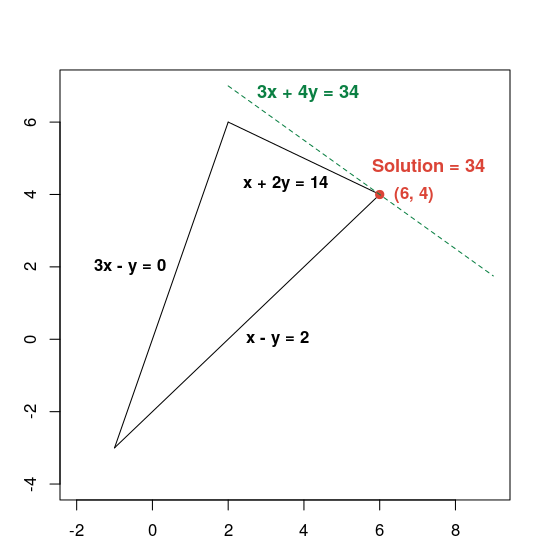

# 3. The N-queens problem

1. Importing the necessary packages

In [ ]:
#!pip install ortools
from __future__ import print_function
from ortools.sat.python import cp_model

2. Defining the main function that contains the resolution logic of the problem.

<html>
<body>
<div><p>The following code defines a function <code>main(board_size)</code> that solves the n-queens problem for a given <code>board_size</code>. The n-queens problem is a problem of placing <code>n</code> queens on an <code>n</code>×<code>n</code> chessboard such that no two queens threaten each other. In this solution, a queen is represented by a column on the chessboard, and the value in the array represents the row where the queen is placed.</p></div>
<div><ol><li><p>The <code>model</code> is created using the <code>cp_model.CpModel()</code> method, which creates an empty constraint programming model.</p></li><li><p>The variables are created using a list comprehension, where the <code>queens</code> list is created with <code>board_size</code> elements, each representing the row where the queen is placed in the corresponding column. The variables are created using the <code>model.NewIntVar</code> method, with a domain of <code>0</code> to <code>board_size-1</code> and a label of <code>x%i</code> where <code>i</code> is the index of the queen.</p></li><li><p>The first constraint is set using the <code>model.AddAllDifferent</code> method, which enforces that all elements in the <code>queens</code> list must be different, meaning that all queens must be in different rows.</p></li><li><p>The second constraint ensures that no two queens are on the same diagonal. This is achieved by creating two arrays <code>diag1</code> and <code>diag2</code> to represent the two diagonals on the chessboard.</p></li><li><p>The inner loop iterates <code>board_size</code> times, creating a new variable <code>q1</code> and <code>q2</code> for each iteration, representing the values on the diagonals.</p></li><li><p>The constraints are added to the model, where <code>q1</code> must be equal to <code>queens[j]+j</code> and <code>q2</code> must be equal to <code>queens[j]-j</code>.</p></li><li><p>The <code>diag1</code> and <code>diag2</code> arrays must be all different, meaning that no two queens can be on the same diagonal. This is enforced using the <code>model.AddAllDifferent</code> method.</p></li><li><p>The <code>solver</code> is created using the <code>cp_model.CpSolver()</code> method, and a <code>solution_printer</code> is created with the <code>queens</code> list as an argument. The <code>status</code> of the solver is set by calling the <code>solver.SearchForAllSolutions</code> method, which searches for all solutions to the constraint programming model.</p></li><li><p>The number of solutions found is printed using the <code>solution_printer.SolutionCount</code> method.</p></li></ol></div>
</body>
</html>

In [ ]:
def main(board_size):

  model = cp_model.CpModel()
  # Creates the variables.
  # The array index is the column, and the value is the row.
  queens = [model.NewIntVar(0, board_size - 1, 'x%i' % i)
            for i in range(board_size)]

  # Creates the constraints.
  # The following sets the constraint that all queens are in different rows.

  model.AddAllDifferent(queens)

  # Note: all queens must be in different columns because the indices of queens are all different.

  # The following sets the constraint that no two queens can be on the same diagonal.

  for i in range(board_size):
    # Note: is not used in the inner loop.
    diag1 = []
    diag2 = []
    for j in range(board_size):
      # Create variable array for queens(j) + j.
      q1 = model.NewIntVar(0, 2 * board_size, 'diag1_%i' % i)
      diag1.append(q1)
      model.Add(q1 == queens[j] + j)
      # Create variable array for queens(j) - j.
      q2 = model.NewIntVar(-board_size, board_size, 'diag2_%i' % i)
      diag2.append(q2)
      model.Add(q2 == queens[j] - j)
    model.AddAllDifferent(diag1)
    model.AddAllDifferent(diag2)


  ### Solve model.
  solver = cp_model.CpSolver()
  solution_printer = SolutionPrinter(queens)
  status = solver.SearchForAllSolutions(model, solution_printer)


  print()
  print('Solutions found : %i' % solution_printer.SolutionCount())
  # Plot the last solution found
  plot_solution([solver.Value(q) for q in queens])


3. In the following block of code we create a simple printing class to output the results.

In [ ]:
class SolutionPrinter(cp_model.CpSolverSolutionCallback):
  """Print intermediate solutions."""

  def __init__(self, variables):
    cp_model.CpSolverSolutionCallback.__init__(self)
    self.__variables = variables
    self.__solution_count = 0

  def OnSolutionCallback(self):
    self.__solution_count += 1
    for v in self.__variables:
      print('%s = %i' % (v, self.Value(v)), end = ' ')
    print()

  def SolutionCount(self):
    return self.__solution_count

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_solution(queens):
    board_size = len(queens)
    chessboard = np.zeros((board_size, board_size))

    for i, row in enumerate(queens):
        chessboard[row][i] = 1  # Place a bishop

    fig, ax = plt.subplots()
    ax.imshow(chessboard, cmap='cividis')

    # Add labels to rows and columns
    ax.set_xticks(np.arange(board_size))
    ax.set_yticks(np.arange(board_size))
    ax.set_xticklabels([str(i + 1) for i in range(board_size)])
    ax.set_yticklabels([chr(65 + i) for i in range(board_size)])

    # Add grid lines
    ax.set_xticks(np.arange(board_size + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(board_size + 1) - 0.5, minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    # Add labels
    ax.set_xlabel('Columns')
    ax.set_ylabel('Rows')
    ax.set_title('N-Queens Solution')

    # Flip the y-axis to match the chessboard orientation
    ax.invert_yaxis()

    plt.show()


4. Calling the main function with the size of the desired chessboard as an input

Streaming output truncated to the last 5000 lines.
x0 = 6 x1 = 9 x2 = 5 x3 = 2 x4 = 0 x5 = 3 x6 = 11 x7 = 7 x8 = 10 x9 = 4 x10 = 1 x11 = 8 
x0 = 3 x1 = 6 x2 = 0 x3 = 5 x4 = 11 x5 = 1 x6 = 10 x7 = 7 x8 = 9 x9 = 4 x10 = 2 x11 = 8 
x0 = 9 x1 = 4 x2 = 8 x3 = 5 x4 = 11 x5 = 2 x6 = 0 x7 = 7 x8 = 3 x9 = 10 x10 = 6 x11 = 1 
x0 = 5 x1 = 2 x2 = 4 x3 = 9 x4 = 7 x5 = 3 x6 = 1 x7 = 11 x8 = 8 x9 = 6 x10 = 0 x11 = 10 
x0 = 4 x1 = 9 x2 = 3 x3 = 5 x4 = 7 x5 = 1 x6 = 11 x7 = 0 x8 = 8 x9 = 6 x10 = 2 x11 = 10 
x0 = 1 x1 = 4 x2 = 6 x3 = 11 x4 = 9 x5 = 2 x6 = 0 x7 = 5 x8 = 3 x9 = 8 x10 = 10 x11 = 7 
x0 = 6 x1 = 4 x2 = 1 x3 = 11 x4 = 8 x5 = 10 x6 = 2 x7 = 0 x8 = 3 x9 = 9 x10 = 7 x11 = 5 
x0 = 10 x1 = 5 x2 = 9 x3 = 6 x4 = 0 x5 = 2 x6 = 11 x7 = 1 x8 = 7 x9 = 4 x10 = 8 x11 = 3 
x0 = 1 x1 = 6 x2 = 8 x3 = 3 x4 = 11 x5 = 9 x6 = 2 x7 = 5 x8 = 10 x9 = 4 x10 = 7 x11 = 0 
x0 = 3 x1 = 9 x2 = 6 x3 = 8 x4 = 10 x5 = 2 x6 = 0 x7 = 5 x8 = 1 x9 = 4 x10 = 11 x11 = 7 
x0 = 3 x1 = 9 x2 = 6 x3 = 8 x4 = 11 x5 = 2 x6 = 0 x7 = 5 x8

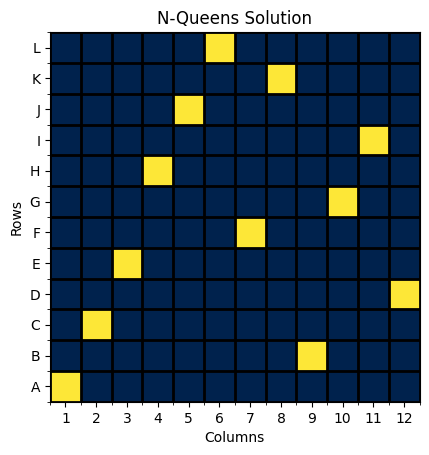

In [ ]:
chessboard_size = 12
main (chessboard_size)

# Homework 1: Resource allocation

A company produces two different products: A and B. The resources available at the moment are composed by **24000 units** of components. Product A has a profit margin of **300CHF** while product B provides **240CHF** of positive margin. We know that product A requires **240 units** while toy B requires **144 units**, and that each typology of product requires **60 minutes** to be assembled. Since the company has still **16 days** of production available, each composed by **8h** total productive time, how many A products and B products should the company produce in order to maximize its profit?

In [ ]:
# Hint: use pywraplp to solve it

# Homework 2: Sudoku

In [ ]:
# Follow the given structure

from ortools.sat.python import cp_model


def solve_sudoku():
    """Solves the sudoku problem with the CP-SAT solver."""
    # Create the model.
    model = cp_model.CpModel()

    cell_size = 3
    line_size = cell_size**2
    line = list(range(0, line_size))
    cell = list(range(0, cell_size))

    initial_grid = [[0, 6, 0, 0, 5, 0, 0, 2, 0], [0, 0, 0, 3, 0, 0, 0, 9, 0],
                    [7, 0, 0, 6, 0, 0, 0, 1, 0], [0, 0, 6, 0, 3, 0, 4, 0, 0],
                    [0, 0, 4, 0, 7, 0, 1, 0, 0], [0, 0, 5, 0, 9, 0, 8, 0, 0],
                    [0, 4, 0, 0, 0, 1, 0, 0, 6], [0, 3, 0, 0, 0, 8, 0, 0, 0],
                    [0, 2, 0, 0, 4, 0, 0, 5, 0]]

    grid = {}
    for i in line:
        for j in line:
            grid[(i, j)] = model.NewIntVar(1, line_size, 'grid %i %i' % (i, j))


# TODO: write your code below the comments

    # 1. AllDifferent on rows.


    # 2. AllDifferent on columns.


    # 3. AllDifferent on cells.


    # 4. Populate the grid with initial values.



    # Solve and print out the solution.
    solver = cp_model.CpSolver()
    status = solver.Solve(model)
    if status == cp_model.OPTIMAL:
        for i in line:
            print([int(solver.Value(grid[(i, j)])) for j in line])


solve_sudoku()